## Intervallschätzung für einen Mittelwert - Die $z$-Verteilung
----------------------------------------

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

%run ../src/notebook_env.py


---------------------------------
Working on the host: LAPTOP-9LETB4SJ

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Mar  8 2022, 15:52:24) [MSC v.1929 64 bit (AMD64)]

---------------------------------
Python interpreter: C:\Users\zak\anaconda3\envs\srh\python.exe


Zum besseren Verständnis der Schätzung eines Populationsmittelwerts und der Konstruktion eines Konfidenzintervalls diskutieren wir das Verfahren anhand eines Datensatzes. Dazu laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Zunächst importieren wir den Datensatz und geben ihm einen passenden Namen.

In [2]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv('students.csv', index_col=0)

Der `students` Datensatz besteht aus 8239 Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und 16 Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud.id, name, gender, age, height, weight, religion, nc.score, semester, major, minor, score1, score2, online.tutorial, graduated, salary*.

In diesem Abschnitt konzentrieren wir uns auf die Größe von Studentinnen. Wir gehen davon aus, dass die im Datensatz angegebenen Größenmessungen eine sehr gute Annäherung an die interessierende Population darstellen, nämlich die Größe der Studentinnen in cm. Die Variable `height` der Studentinnen ist annähernd normalverteilt - was durch die symmetrische Glockenform des Populationshistogramms bestätigt wird.

In [3]:
# Lese Spalte 'height' ein
genderheight = students[{'gender','height'}]

C:\Users\zak\AppData\Local\Temp\ipykernel_9828\1715817709.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  genderheight = students[{'gender','height'}]


In [4]:
female = genderheight.loc[genderheight['gender'] == 'Female']

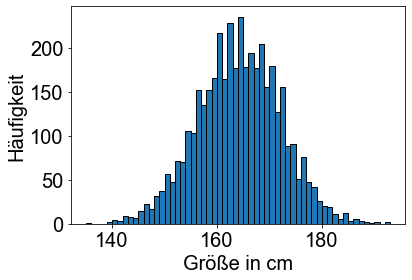

In [5]:
# Bestimme Anzahl Bins
bins = max(female['height'])-min(female['height'])

# Plotte die Werte als Histogramm
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(female['height'],bins,edgecolor='k',width=1.0)

# Erzeuge Labels
ax.set_ylabel('Häufigkeit')
ax.set_xlabel('Größe in cm')

plt.show()

Auf der Grundlage der gegebenen Daten berechnen wir zunächst den Populationsmittelwert $\mu$ und die Populationsstandardabweichung $\sigma$.

In [6]:
f_mean = np.mean(female['height'])
f_mean

163.65328467153284

In [7]:
f_std = np.std(female['height'])
f_std

7.918762263149209

Anschließend konstruieren wir eine Wahrscheinlichkeitsverteilung, indem wir die Funktion `norm.pdf()` anwenden, die durch die zuvor berechneten Parameter $\mu$ und $\sigma$ definiert ist, und stellen sie über dem Histogramm dar.

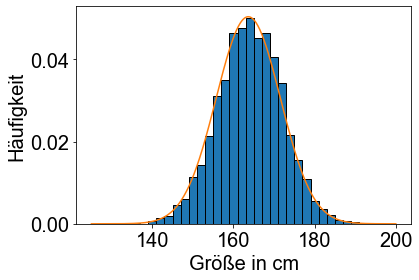

In [8]:
x = np.linspace(125,200,500)
y_x = norm.pdf(x,f_mean,f_std)

# Bestimme Anzahl Bins
bins = max(female['height'])-min(female['height'])

# Plotte die Werte als Histogramm
fig = plt.figure()

ax = fig.add_subplot(111)
ax.hist(female['height'],bins=29,edgecolor='k',width=2.0,density = True)
ax.plot(x,y_x)
# Erzeuge Labels
ax.set_ylabel('Häufigkeit')
ax.set_xlabel('Größe in cm')

plt.show()

Eine gute Übereinstimmung!

Nun nehmen wir eine Zufallsstichprobe mit einem Stichprobenumfang von $n=10$
aus der Wahrscheinlichkeitsverteilung, indem wir die Funktion `norm.rvs()` anwenden und den Stichprobenmittelwert $\bar{x}$ berechnen.

In [9]:
# Grösse der Stichprobe
sample_size = 10

# Wähle normalverteilte Zufallszahlen mit Mittelwert f_mean und Standardabweichung f_std aus
sample = norm.rvs(f_mean,f_std,sample_size,random_state =1)
sample

array([176.51608944, 158.80893107, 159.47081813, 155.15670124,
       170.50624195, 145.42794689, 177.47003423, 157.62546819,
       166.17967943, 161.67857995])

In [10]:
sample_mean = np.mean(sample)
sample_mean

162.88404905120882

Unsere Stichprobe ergibt einen Stichprobenmittelwert $\bar{x}$ von etwa $162,884$. Dies ist unser Punktschätzer für den interessierenden Grundgesamtheitsparameter, der in diesem Fall die durchschnittliche Körpergröße der Studentinnen ($\mu$).

Wie genau ist unsere Punktschätzung? Wir fragen Python, ob unsere Schätzung mit dem wahren Grundgesamtheitsparameter übereinstimmt.

In [12]:
sample_mean == f_mean

False

OK, das haben wir erwartet!

Berechnen wir nun einige Intervallschätzungen, indem wir die $90\%-, 95\%-$ und $99\%-$ Konfidenzintervalle konstruieren. Erinnern Sie sich an die Gleichung für ein Konfidenzintervall.

$$CI: \text{Punktschätzung} \pm z^*_{\alpha/2} \times \frac{\sigma}{\sqrt{n}}$$

Der kritische Wert $z^*_{\alpha/2}$ beträgt $1,64$, $1,96$ und $2,58$ für Konfidenzniveaus von $90\%, 95\%$ bzw. $99\%$.

Angewandt auf unsere Daten ergibt die Gleichung

$$CI_{90\%}: 162,884 \pm 1,64 \times \frac{7,92}{\sqrt{10}} = 162,884 \pm 4,12$$

Wir können also mit $90\%$iger Sicherheit sagen, dass die durchschnittliche Körpergröße der Studenten (der Grundgesamtheitsparameter $\mu$) zwischen $158,764$ und $167,004$ cm liegt.

$$CI_{95\%}: 162,884 \pm 1,96 \times \frac{7,92}{\sqrt{10}} = 162,884 \pm 4,91$$

Wir können also mit 95%iger Sicherheit sagen, dass die durchschnittliche Körpergröße der Studenten zwischen $157,974$ und $167,794$ cm liegt.

$$CI_{99\%}: 162,884 \pm 2,58 \times \frac{7,92}{\sqrt{10}} = 162,884 \pm 6,45$$

Wir können also mit $99\%$iger Sicherheit sagen, dass die durchschnittliche Körpergröße der Studenten zwischen $156,434$ und $169,334$ cm liegt.

Es liegt auf der Hand, **dass die Fehlerspanne größer wird, wenn man eine höhere Sicherheit haben will, dass der unbekannte Grundgesamtheitsparameter im Intervall enthalten ist**.

Zur Überprüfung der Richtigkeit wollen wir untersuchen, ob wir mit unseren Intervallschätzungen tatsächlich den wahren Wert der Grundgesamtheit erfasst haben. Es ist wichtig, sich daran zu erinnern, dass das Konfidenzintervall unserem Stichprobenmittelwert keine Wahrscheinlichkeit zuweist, sondern besagt, dass das Konfidenzintervall bei wiederholten Zufallsstichproben den Mittelwert der Grundgesamtheit in $100(1-\alpha)\%$ der Fälle enthalten soll. Um diese Behauptung zu testen, schreiben wir selbst eine einfache Python-Funktion.

In [12]:
def CI_eval(pop_mean, sigma, n, estimate, alpha):
    out=[]
    for i in range(0,len(alpha)):
        out.append(pop_mean >= estimate - norm.ppf(1-alpha[i]/2)*sigma/np.sqrt(n) and pop_mean <= estimate + norm.ppf(1-alpha[i]/2)*sigma/np.sqrt(n))
    return out

Wenden wir nun unsere selbst erstellte Funktion `CI_eval()` auf unsere Daten an. Wir setzen `pop_mean = f_mean`, `sigma = f_std`, `n = sample_size`, `estimate = sample_mean`, `alpha = [0.1, 0.05, 0.01]`, um zu evaluieren, ob die drei oben konstruierten Konfidenzintervalle ($90\%, 95\%$ und $99\%$) den Grundgesamtheitsmittelwert enthalten. Schließlich wandeln wir den resultierenden Vektor in ein `dataframe` -Objekt um, um die Lesbarkeit zu verbessern.

In [13]:
# Wende Funktion CI_eval an und speichere Ergebnis in eval
eval = CI_eval(pop_mean = f_mean, sigma = f_std, n = sample_size, estimate = sample_mean, alpha = [0.1, 0.05, 0.01])

# Erzeuge Dataframe
df = pd.DataFrame({'eval':eval},
                  index=['90%', '95%', '99%'])
df

,eval
90%,True
95%,True
99%,True


Ein interessantes Ergebnis. Der wahre Mittelwert der Grundgesamtheit (`f_mean` = $163,65$) wird von allen drei Konfidenzintervallen erfasst. Der Mittelwert unserer Zufallsstichprobe (`sample_mean` = $162,884$) war ein recht guter Schätzer.

Bislang haben wir uns nur auf eine bestimmte Stichprobe konzentriert. Was sollten wir jedoch erwarten, wenn wir den Stichprobenprozess immer und immer wieder wiederholen?

Ein Konfidenzintervall eines bestimmten Konfidenzniveaus besagt, dass bei wiederholten Stichproben erwartet wird, dass das Konfidenzintervall den wahren Populationsparameter in $100(1-\alpha)\%$ der Zeit einschließt. Ein Konfidenzintervall von $99 \%$ bedeutet also, dass die Fehlermarge im Durchschnitt in $99$ von $100$ Fällen groß genug ist, um den wahren Wert der Grundgesamtheit einzuschließen; dies bedeutet jedoch auch, dass wir uns im Durchschnitt in einem von $100$ Fällen irren. Außerdem liegen wir bei einem Konfidenzintervall von $95 \%$ bzw. $90 \%$ in $5$ bzw. $10$ von $100$ Fällen falsch. Wir verwenden die Python-Maschinerie, um diese Behauptung zu testen, indem wir ein Simulationsexperiment durchführen.

Wir ziehen eine Stichprobe aus der Verteilung der Körpergrösse von oben. Wir nehmen $10$, $50$, $100$, $1000$ und $10000$ Zufallsstichproben. Jede Stichprobe hat einen Stichprobenumfang von $n=10$. Für jede Stichprobe berechnen wir den Stichprobenmittelwert $\bar{x}$, der für unsere Stichprobenstatistik von Interesse ist. Durch Anwendung unserer selbst erstellten Funktion `CI_eval()` testen wir, ob der wahre Mittelwert der Grundgesamtheit durch das $90\%-$, $95\%-$ und $99\%-$ Konfidenzintervall erfasst wird. Wir speichern den resultierenden booleschen Vektor und berechnen den Anteil der Fälle, in denen jedes bestimmte Konfidenzintervall tatsächlich den wahren Mittelwert der Grundgesamtheit enthält. Schließlich speichern wir den Anteil als Prozentsatz in einem `dataframe` -Objekt und benennen seine Zeilen und Spalten zur besseren Lesbarkeit um.

In [14]:
trials = [10,100,1000,10000]

for trial in trials:
    evals = []
    df = pd.DataFrame()
    # Wende Funktion CI_eval an und speichere Ergebnis in eval
    for i in range(trial):
        sample = norm.rvs(f_mean,f_std,trial)
        sample_mean = np.mean(sample)
        evals.append(CI_eval(pop_mean = f_mean, sigma = f_std, n = trial, estimate = sample_mean, alpha = [0.1, 0.05, 0.01]))
    df = pd.DataFrame(evals, columns = ['90', '95','99'])
    sum_df = df.sum()
    print(sum_df/trial, trial, ':Stichproben')

90    1.0
95    1.0
99    1.0
dtype: float64 10 :Stichproben
90    0.80
95    0.90
99    0.99
dtype: float64 100 :Stichproben
90    0.904
95    0.948
99    0.993
dtype: float64 1000 :Stichproben
90    0.8987
95    0.9474
99    0.9880
dtype: float64 10000 :Stichproben


Es zeigt sich, dass mit zunehmender Anzahl von Stichproben die Zahlen konvergieren und die Wahrscheinlichkeit widerspiegeln, die durch das Vertrauensniveau gegeben ist.